In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Data Preprocessing --------- start
# get what it opened based on day
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values


In [3]:
from sklearn.preprocessing import MinMaxScaler

# scale the training set normailization when doing RNN
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [4]:
# create special data structure
# input - the 60 previous stock before that finatial day 
X_train = []
# output - predicted stock price that day
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [5]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
# Data Preprocessing --------- exit

We will train a RNN that will predict the months trend for google stock in the month of january

In [6]:
# Building RNN --------- start
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

regressor = Sequential()

# units number of LSTM cells - 50
# return sequences need to equal true cause its multiple layers
# input shape
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)


2021-10-11 08:46:43.457754: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-10-11 08:46:44.517993: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
38/38 [==============================] - 8s 59ms/step - loss: 0.0439
Epoch 2/100
38/38 [==============================] - 2s 58ms/step - loss: 0.0075
Epoch 3/100
38/38 [==============================] - 2s 62ms/step - loss: 0.0051
Epoch 4/100
38/38 [==============================] - 2s 60ms/step - loss: 0.0054
Epoch 5/100
38/38 [==============================] - 2s 58ms/step - loss: 0.0056
Epoch 6/100
38/38 [==============================] - 3s 75ms/step - loss: 0.0046
Epoch 7/100
38/38 [==============================] - 3s 67ms/step - loss: 0.0054
Epoch 8/100
38/38 [==============================] - 3s 68ms/step - loss: 0.0044
Epoch 9/100
38/38 [==============================] - 2s 59ms/step - loss: 0.0046
Epoch 10/100
38/38 [==============================] - 2s 57ms/step - loss: 0.0046
Epoch 11/100
38/38 [==============================] - 2s 54ms/step - loss: 0.0044
Epoch 12/100
38/38 [==============================] - 2s 59ms/step - loss: 0.0044
Epoch 13/100
38/38 [=====

In [7]:
# Building RNN --------- exit

In [18]:
# Making RNN pred --------- start
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)

# first finatial day of 2017 to last stock price of entire data set  
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values


inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

[[0.9299055 ]
 [0.93113327]
 [0.92750577]
 [0.94415507]
 [0.93876032]
 [0.93403527]
 [0.93483518]
 [0.9313937 ]
 [0.94636878]
 [0.96569685]
 [0.97510976]
 [0.95966962]
 [0.97808617]
 [1.        ]
 [0.98076494]
 [0.97083116]
 [0.98450406]
 [0.96054394]
 [0.9371419 ]
 [0.92841729]
 [0.90804747]
 [0.8771858 ]
 [0.92153434]
 [0.93809063]
 [0.93165414]
 [0.95254483]
 [0.88812412]
 [0.88637547]
 [0.87032145]
 [0.88563137]
 [0.90743359]
 [0.91571173]
 [0.89941588]
 [0.91805566]
 [0.9089404 ]
 [0.9024853 ]
 [0.89456061]
 [0.91600938]
 [0.9132934 ]
 [0.88979835]
 [0.86589404]
 [0.89030062]
 [0.90335962]
 [0.89642086]
 [0.91777662]
 [0.93176576]
 [0.94114145]
 [0.95762334]
 [0.96413424]
 [0.96402262]
 [0.96971501]
 [0.95077759]
 [0.96294367]
 [0.96123223]
 [0.95475854]
 [0.95204256]
 [0.95163331]
 [0.95725128]
 [0.93796041]
 [0.93688146]
 [0.92955205]
 [0.94731751]
 [0.94307612]
 [0.96015329]
 [0.98087655]
 [0.98359253]
 [0.97827219]
 [0.98225314]
 [0.98288563]
 [0.98214153]
 [0.979779  ]
 [0.97

In [31]:
import math
from sklearn.metrics import mean_squared_error

rmse = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))
error = []
#Then consider dividing this RMSE by the range of the Google Stock Price values 
#of January 2017 (that is around 800) to get a relative error,
for i in real_stock_price:
    relative_error = rmse / i
    error.append(relative_error[0])

[0.015834798436322715, 0.01564297956541744, 0.015688351529351326, 0.01550725469681927, 0.015293029972956961, 0.015265391738905865, 0.015319626546822972, 0.015279009056907714, 0.015272575630594556, 0.015280144930109148, 0.015304227262248537, 0.015317343216157209, 0.015283364154853074, 0.015276927061248054, 0.014997323811495189, 0.014864997673865737, 0.01471968509589584, 0.014774352014702702, 0.015137970896070132, 0.015476117975795614]


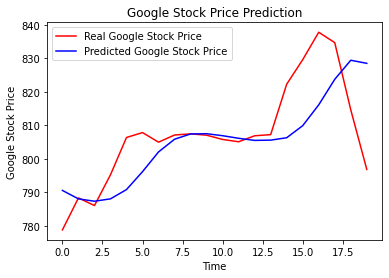

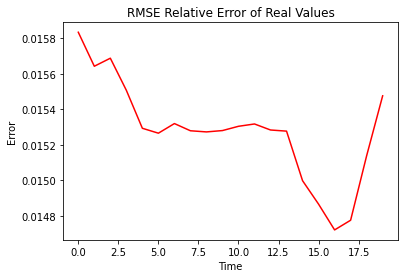

In [35]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()
# Making RNN pred --------- exit

plt.plot(error, color = 'red')
plt.title('RMSE Relative Error of Real Values')
plt.xlabel('Time')
plt.ylabel('Error')
plt.show()

Possible Future Imporovements to RNN:
1) larger test data of google instead of 5 years:10 years 
2) increasing number of timesteps instead of 60:120
3) Understanding indicators of some other companies that might be correlated to Google, add this other stock
   price and use it as a new indicator in the training data.
4) Adding more LSTM layers: we built a RNN with four LSTM layers.
5) Adding more neurones in the LSTM layers: a high number of neurones in the LSTM layers responds better to the complexity of the problem 50 neurones in each of our 4 LSTM layers: 100 neurones in each of our 8 LSTM layers